# School Trust Indicators
Dataset website link: https://data.cityofnewyork.us/Education/2017-2018-School-Quality-Report-District-75-School/qy3b-p2ms  
Dataset csv link: https://data.cityofnewyork.us/resource/qy3b-p2ms.csv


## Objective

We aim to investigate whether there exists a positive correlation between the extent of collaboration among teachers, the presence of a supportive environment, and a strong sense of community and family ties, with the level of trust within NYC District 75 Schools.


In [ ]:
# Imports and reading CSV

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

csv_URL = "https://data.cityofnewyork.us/resource/qy3b-p2ms.csv"
df = pd.read_csv(csv_URL)
df.head()


,dbn,school_name,school_type,enrollment,rigorous_instruction_rating,collaborative_teachers_rating,supportive_environment_rating,effective_school_leadership,strong_family_community_ties,trust_rating,...,percent_in_temp_housing,percent_hra_eligible,percent_asian,percent_black,percent_hispanic,percent_white,years_of_principal_experience,percent_of_teachers_with,average_change_in_student,teacher_attendance_rate
0,75K004,P.S. K004,D75,296,Exceeding Target,Meeting Target,NaN,Exceeding Target,Exceeding Target,Meeting Target,...,0.115,0.828,0.054,0.611,0.253,0.068,9.7,0.931,-0.006,0.949
1,75K036,P.S. 36,D75,312,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,...,0.216,0.903,0.051,0.631,0.240,0.061,15.9,0.727,0.003,0.947
2,75K053,P.S. K053,D75,474,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,...,0.072,0.877,0.093,0.371,0.363,0.114,7.6,0.637,-0.008,0.962
3,75K077,P.S. K077,D75,284,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,...,0.060,0.844,0.158,0.412,0.225,0.204,2.6,0.659,-0.014,0.945
4,75K140,P.S. K140,D75,303,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,Meeting Target,...,0.218,0.884,0.030,0.667,0.248,0.017,6.6,0.693,-0.004,0.946


# Exploratory Data Analysis
Feature insights

In [ ]:
df.shape

(60, 41)

In [ ]:
# Print column names
df.columns=[col.upper() for col in df.columns]
for col in df.columns:
    print(col)

DBN
SCHOOL_NAME
SCHOOL_TYPE
ENROLLMENT
RIGOROUS_INSTRUCTION_RATING
COLLABORATIVE_TEACHERS_RATING
SUPPORTIVE_ENVIRONMENT_RATING
EFFECTIVE_SCHOOL_LEADERSHIP
STRONG_FAMILY_COMMUNITY_TIES
TRUST_RATING
RIGOROUS_INSTRUCTION_PERCENT
COLLABORATIVE_TEACHERS_PERCENT
SUPPORTIVE_ENVIRONMENT_PERCENT
EFFECTIVE_SCHOOL_LEADERSHIP_1
STRONG_FAMILY_COMMUNITY_TIES_1
TRUST_PERCENT_POSITIVE
QUALITY_REVIEW_HOW_INTERESTING
QUALITY_REVIEW_HOW_EFFECTIVE
QUALITY_REVIEW_HOW_WELL_DOES
QUALITY_REVIEW_HOW_CLEARLY
QUALITY_REVIEW_HOW_WELL_DO
QUALITY_REVIEW_HOW_SAFE_AND
QUALITY_REVIEW_HOW_WELL_DOES_1
QUALITY_REVIEW_HOW_WELL_DOES_2
QUALITY_REVIEW_HOW_THOUGHTFUL
QUALITY_REVIEW_HOW_WELL_ARE
QUALITY_REVIEW_DATES_OF_REVIEW
PERCENT_ENGLISH_LANGUAGE
PERCENT_STUDENTS_WITH
PERCENT_SELF_CONTAINED
ECONOMIC_NEED_INDEX
PERCENT_IN_TEMP_HOUSING
PERCENT_HRA_ELIGIBLE
PERCENT_ASIAN
PERCENT_BLACK
PERCENT_HISPANIC
PERCENT_WHITE
YEARS_OF_PRINCIPAL_EXPERIENCE
PERCENT_OF_TEACHERS_WITH
AVERAGE_CHANGE_IN_STUDENT
TEACHER_ATTENDANCE_RATE


In [ ]:
# Rename long column names
new_column_names = {
    'QUALITY_REVIEW_HOW_INTERESTING': 'QR: CURRICULUM',
    'QUALITY_REVIEW_HOW_EFFECTIVE' : 'QR: EFFECTIVENESS',
    'QUALITY_REVIEW_HOW_WELL_DOES' : 'QR: ASSESSMENTS',
    'QUALITY_REVIEW_HOW_CLEARLY' : 'QR: COMMUNICATION',
    'QUALITY_REVIEW_HOW_WELL_DO' : 'QR: TEACHER_COLLAB',
    'QUALITY_REVIEW_HOW_SAFE_AND' : 'QR: INCLUSION',
    'QUALITY_REVIEW_HOW_WELL_DOES_1' : 'QR: RESOURCE_MGMT',
    'QUALITY_REVIEW_HOW_WELL_DOES_2' : 'QR: GOAL_TRACKING',
    'QUALITY_REVIEW_HOW_THOUGHTFUL' : 'QR: TEACHER_DEVELOPMENT',
    'QUALITY_REVIEW_HOW_WELL_ARE' : 'QR: DECISIONS',
    'QUALITY_REVIEW_DATES_OF_REVIEW' : 'QR: DATES',
}
df.rename(columns=new_column_names, inplace=True)
df.head()

df.columns=[col.upper() for col in df.columns]
for col in df.columns:
    print(col)


DBN
SCHOOL_NAME
SCHOOL_TYPE
ENROLLMENT
RIGOROUS_INSTRUCTION_RATING
COLLABORATIVE_TEACHERS_RATING
SUPPORTIVE_ENVIRONMENT_RATING
EFFECTIVE_SCHOOL_LEADERSHIP
STRONG_FAMILY_COMMUNITY_TIES
TRUST_RATING
RIGOROUS_INSTRUCTION_PERCENT
COLLABORATIVE_TEACHERS_PERCENT
SUPPORTIVE_ENVIRONMENT_PERCENT
EFFECTIVE_SCHOOL_LEADERSHIP_1
STRONG_FAMILY_COMMUNITY_TIES_1
TRUST_PERCENT_POSITIVE
QR: CURRICULUM
QR: EFFECTIVENESS
QR: ASSESSMENTS
QR: COMMUNICATION
QR: TEACHER_COLLAB
QR: INCLUSION
QR: RESOURCE_MGMT
QR: GOAL_TRACKING
QR: TEACHER_DEVELOPMENT
QR: DECISIONS
QR: DATES
PERCENT_ENGLISH_LANGUAGE
PERCENT_STUDENTS_WITH
PERCENT_SELF_CONTAINED
ECONOMIC_NEED_INDEX
PERCENT_IN_TEMP_HOUSING
PERCENT_HRA_ELIGIBLE
PERCENT_ASIAN
PERCENT_BLACK
PERCENT_HISPANIC
PERCENT_WHITE
YEARS_OF_PRINCIPAL_EXPERIENCE
PERCENT_OF_TEACHERS_WITH
AVERAGE_CHANGE_IN_STUDENT
TEACHER_ATTENDANCE_RATE


## Variable definitions

DBN is the unique identifier for each school  
SCHOOL_NAME is the name of the school  
SCHOOL_TYPE is the type of school. This dataset is concerned with NYC District 75 schools (D75)  
ENROLLMENT is the number of students enrolled in the school (Numerical)  
  
The below six variables are categorical variables with the following possible values: Exceeding Target, Meeting Target, Approaching Target  
RIGOROUS_INSTRUCTION_RATING  is the rating of the school's instruction rigor   
COLLABORATIVE_TEACHERS_RATING is the rating of the school's teacher collaborativity (Categorical)  
SUPPORTIVE_ENVIRONMENT_RATING is the rating of how supportive and inclusive the schools environment is  
EFFECTIVE_SCHOOL_LEADERSHIP_RATING is the rating of how effective the school's leadership is  
STRONG_FAMILY_COMMUNITY_TIES_RATING is the rating of how strong the school's family and community ties are  
TRUST_RATING is the rating of how much the school is trusted by the community  
  
  
The below six variables are numerical variables that are percentages that quantify the above six ratings  
RIGOROUS_INSTRUCTION_PERCENT   is the percentage of the school's instruction rigor  
COLLABORATIVE_TEACHERS_PERCENT is the percentage of the school's teacher collaborativity  
SUPPORTIVE_ENVIRONMENT_PERCENT is the percentage of how supportive and inclusive the schools environment is  
EFFECTIVE_SCHOOL_LEADERSHIP_1  is the percentage of how effective the school's leadership is  
STRONG_FAMILY_COMMUNITY_TIES_1 is the percentage of how strong the school's family and community ties are  
TRUST_PERCENT_POSITIVE         is the percentage of how much the school is trusted by the community  
  
The below ten variables are categorical variables with the following possible values: Well Developed, Proficient, Developing  
QR: CURRICULUM          reviews how interesting and challenging the curriculum is  
QR: EFFECTIVENESS       reviews how effective the teaching and learning is  
QR: ASSESSMENTS         reviews how well the school asseses what students are learning  
QR: COMMUNICATION       reviews how clearly high expectations are communicated to the students and staff  
QR: TEACHER_COLLAB      reviews how well teachers collaborate with each other  
QR: INCLUSION           reviews how safe and inclusive the school is whiel supporting social-emotional growth  
QR: RESOURCE_MGMT       reviews how well the school allocates and manages its resources  
QR: GOAL_TRACKING       reviews how well the school can identify, track, and meet its goals  
QR: TEACHER_DEVELOPMENT reviews how thoughtful the school's approach to teacher developent and evaluation is  
QR: DECISIONS           reviews how well school decisions are evaluated and adjusted  


QR: DATES                  is the date the quality review was done  
PERCENT_ENGLISH_LANGUAGE   is the percentage of students who are English Language Learners  
PERCENT_STUDENTS_WITH      is the percentage of students with disabilities  
PERCENT_SELF_CONTAINED     is the percentage of students in self-contained classes  
ECONOMIC_NEED_INDEX        is the economic need index of the school  
PERCENT_IN_TEMP_HOUSING    is the percentage of students in temporary housing  
PERCENT_HRA_ELIGIBLE       is the percentage of students who are HRA eligible  
PERCENT_ASIAN              is the percentage of students who are Asian  
PERCENT_BLACK              is the percentage of students who are Black  
PERCENT_HISPANIC           is the percentage of students who are Hispanic  
PERCENT_WHITE              is the percentage of students who are White  
YEARS_OF_PRINCIPAL_EXPERIENCE  is the number of years of experience the principal has  
PERCENT_OF_TEACHERS_WITH       is the percentage of teachers with 3+ years of experience  
AVERAGE_CHANGE_IN_STUDENT      is the average change in student attendance  
TEACHER_ATTENDANCE_RATE        is the teacher attendance rate  

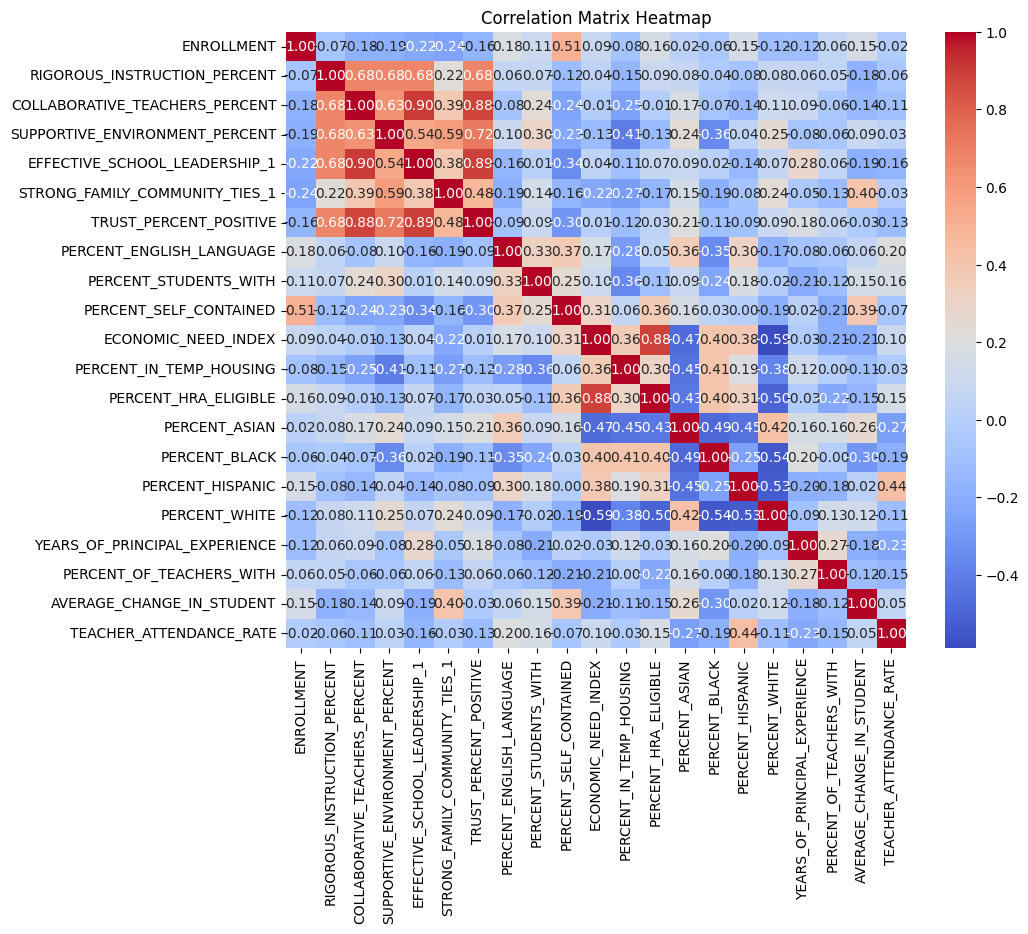

TRUST_PERCENT_POSITIVE            1.000000
EFFECTIVE_SCHOOL_LEADERSHIP_1     0.889999
COLLABORATIVE_TEACHERS_PERCENT    0.878530
SUPPORTIVE_ENVIRONMENT_PERCENT    0.718633
RIGOROUS_INSTRUCTION_PERCENT      0.678998
STRONG_FAMILY_COMMUNITY_TIES_1    0.477005
PERCENT_SELF_CONTAINED            0.303262
PERCENT_ASIAN                     0.205772
YEARS_OF_PRINCIPAL_EXPERIENCE     0.175152
ENROLLMENT                        0.161880
TEACHER_ATTENDANCE_RATE           0.127539
PERCENT_IN_TEMP_HOUSING           0.121216
PERCENT_BLACK                     0.106872
PERCENT_HISPANIC                  0.093977
PERCENT_ENGLISH_LANGUAGE          0.092321
PERCENT_WHITE                     0.090729
PERCENT_STUDENTS_WITH             0.089236
PERCENT_OF_TEACHERS_WITH          0.064974
AVERAGE_CHANGE_IN_STUDENT         0.034618
PERCENT_HRA_ELIGIBLE              0.032966
ECONOMIC_NEED_INDEX               0.005126
Name: TRUST_PERCENT_POSITIVE, dtype: float64


In [ ]:
# Creating a correlation matrix

correlation_matrix = df.corr()

# Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation of features with target variable of school trust percent rating
correlation_with_target = correlation_matrix['TRUST_PERCENT_POSITIVE'].abs().sort_values(ascending=False)
print(correlation_with_target)

Maximum Enrollment: 901.0
Minimum Enrollment: 33.0
Mean Enrollment: 406.26


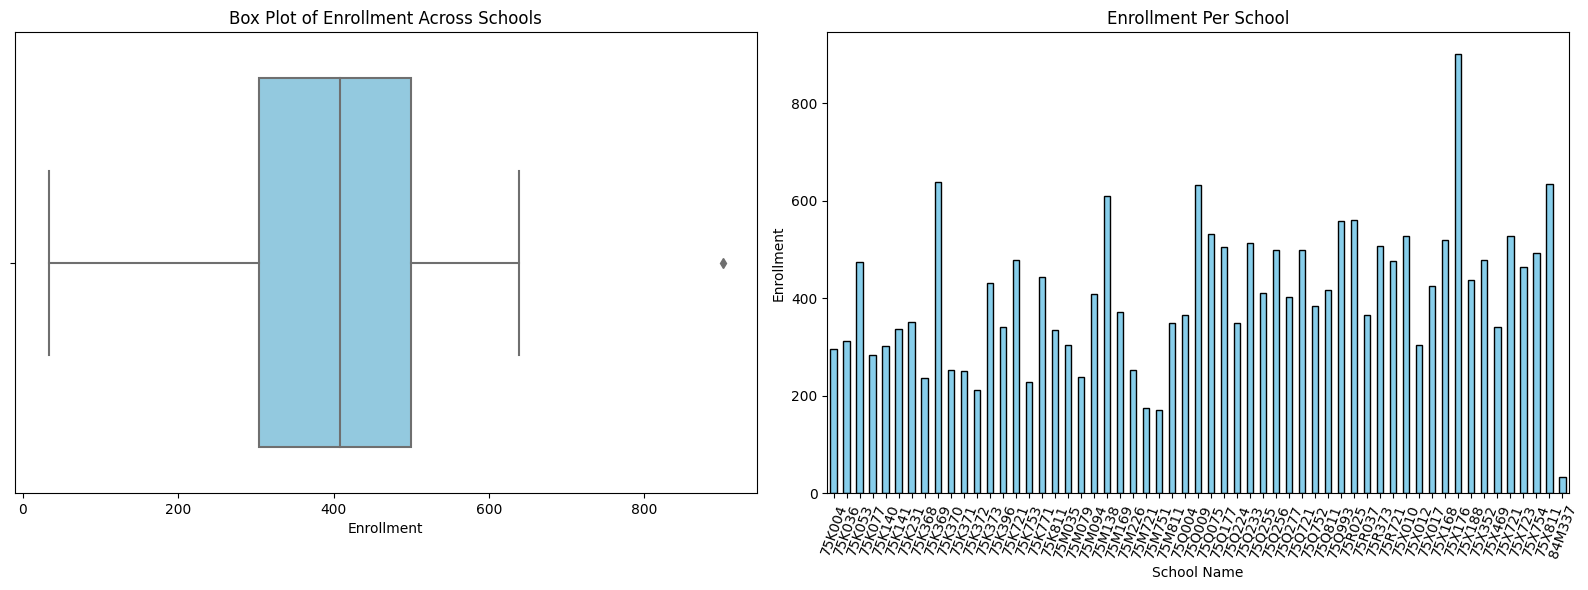

In [ ]:
# FEATURE: ENROLLMENT

# Assuming df is your DataFrame
enrollment_stats = df['ENROLLMENT'].describe()

# Extract specific statistics
enrollment_max = enrollment_stats['max']
enrollment_mean = enrollment_stats['mean']
enrollment_min = enrollment_stats['min']

# Print the statistics
print(f"Maximum Enrollment: {enrollment_max}")
print(f"Minimum Enrollment: {enrollment_min}")
print(f'Mean Enrollment: {enrollment_mean:.2f}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Box plot
sns.boxplot(x=df['ENROLLMENT'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Enrollment')
axes[0].set_title('Box Plot of Enrollment Across Schools')

# Bar plot
average_enrollment_by_school = df.groupby('DBN')['ENROLLMENT'].mean()
average_enrollment_by_school.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_xlabel('School Name')
axes[1].set_ylabel('Enrollment')
axes[1].set_title('Enrollment Per School')
axes[1].tick_params(axis='x', rotation=70)

plt.tight_layout()
plt.show()

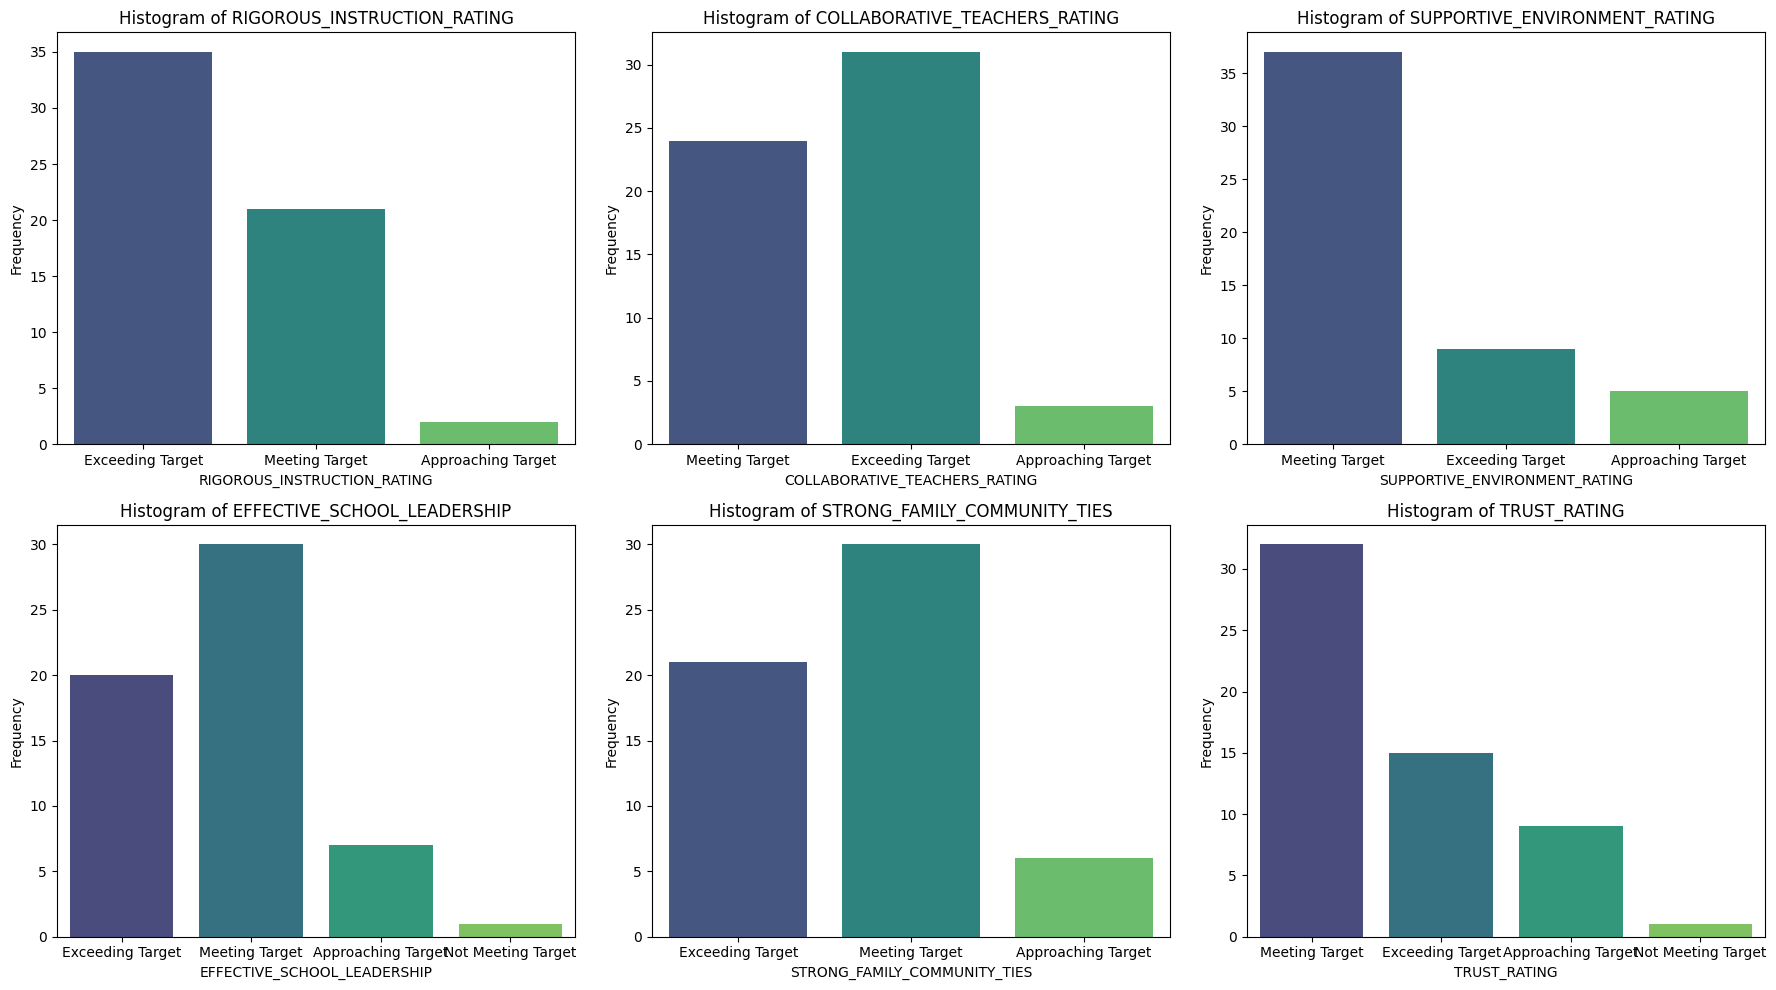

In [ ]:
# FEATURE: RATINGS

ratings = ['RIGOROUS_INSTRUCTION_RATING', 'COLLABORATIVE_TEACHERS_RATING', 'SUPPORTIVE_ENVIRONMENT_RATING', 'EFFECTIVE_SCHOOL_LEADERSHIP', 'STRONG_FAMILY_COMMUNITY_TIES', 'TRUST_RATING']

# Create a figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Create histograms
for i, feature in enumerate(ratings):
    plt.sca(axes[i])
    sns.countplot(x=df[feature], palette='viridis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')


plt.tight_layout()
plt.show()

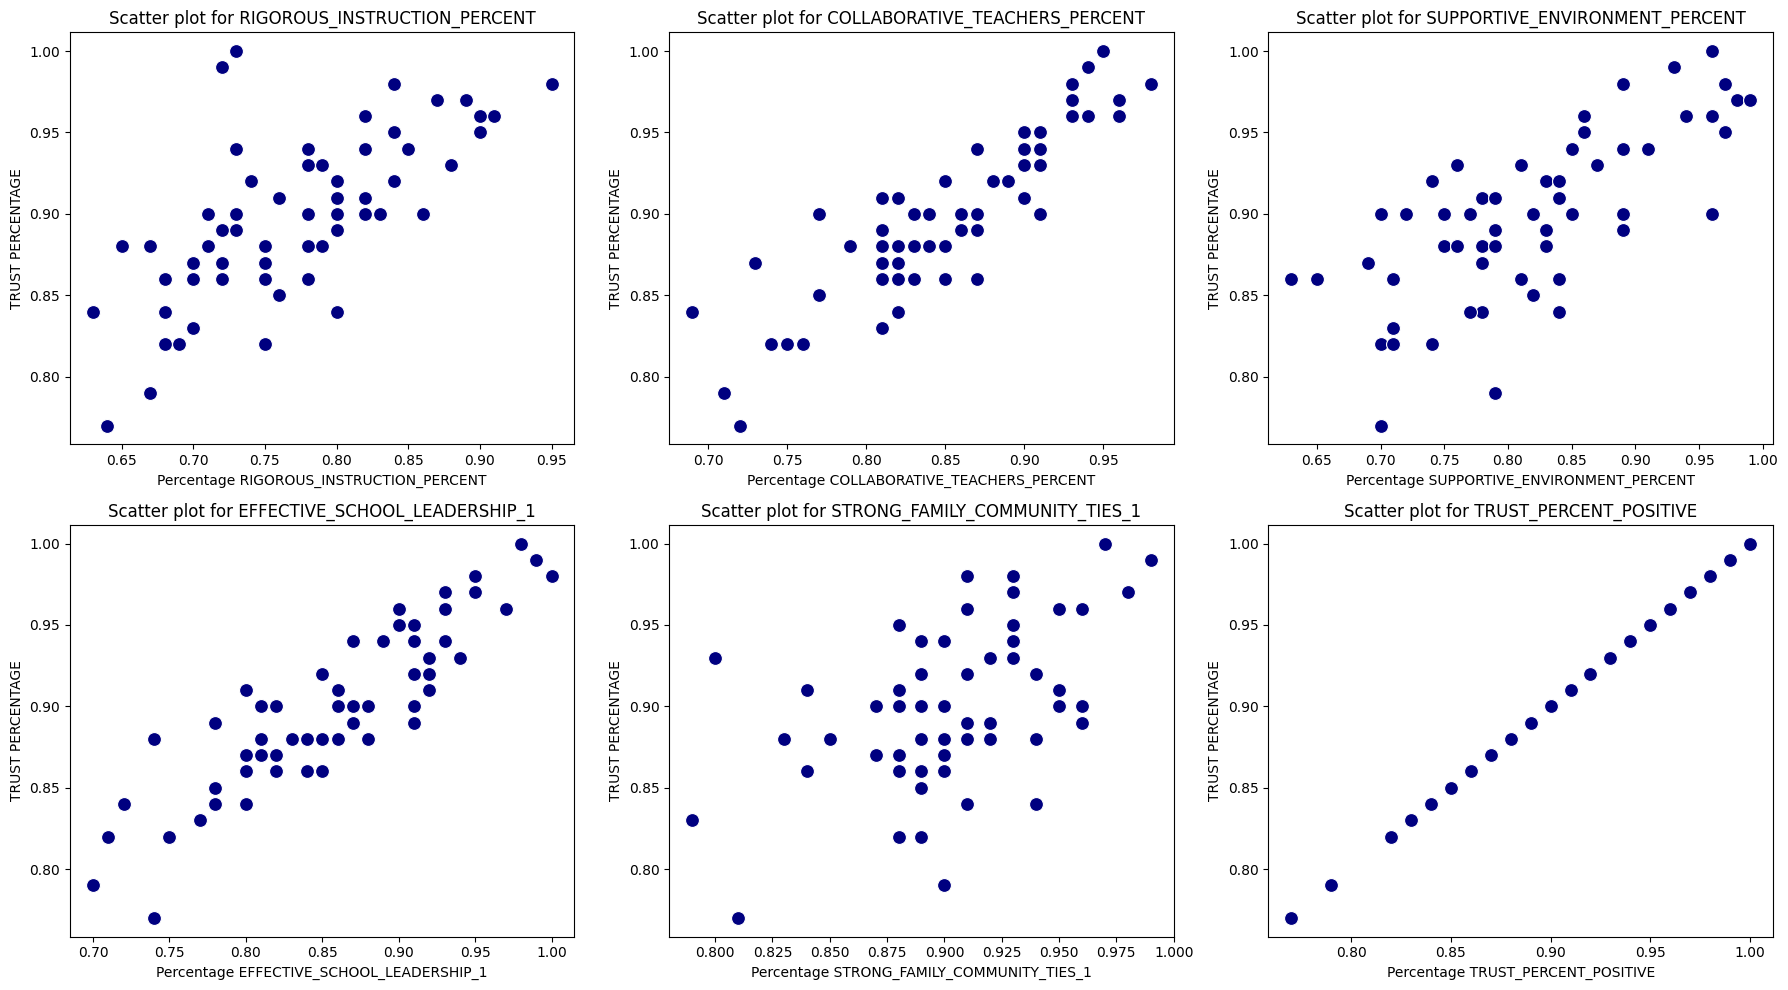

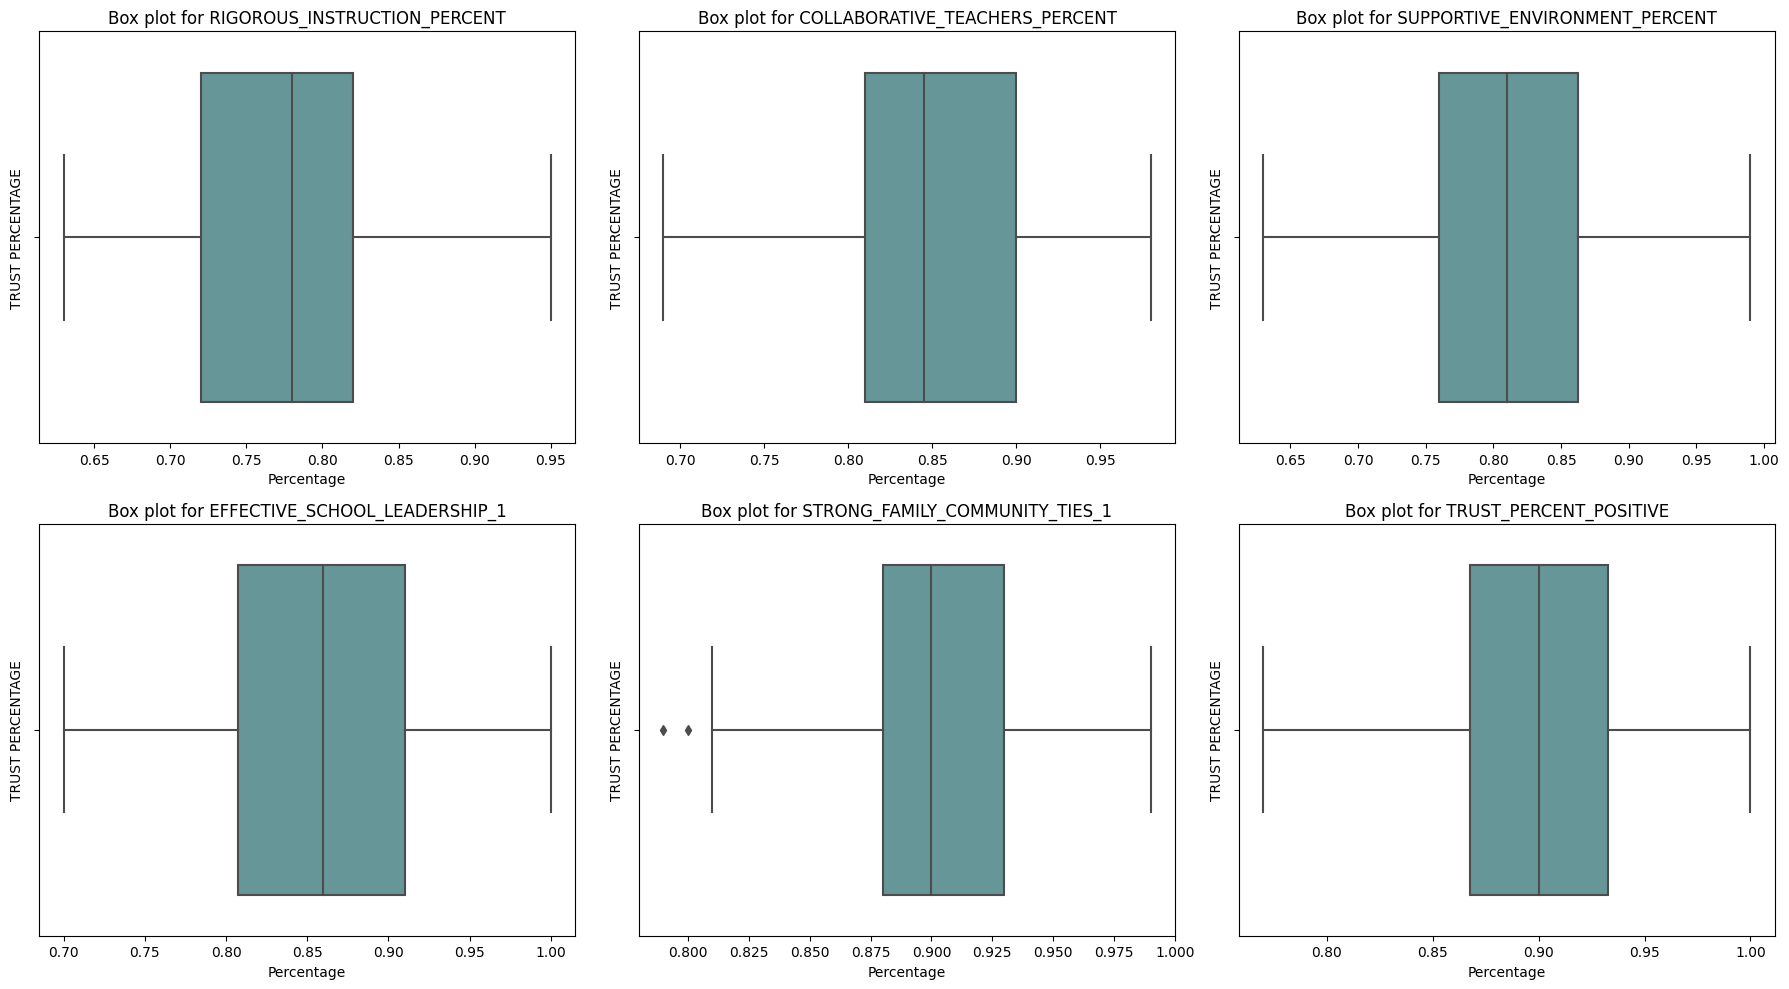

In [ ]:
# FEATURE: PERCENTAGES

percentages = ['RIGOROUS_INSTRUCTION_PERCENT', 'COLLABORATIVE_TEACHERS_PERCENT',
                       'SUPPORTIVE_ENVIRONMENT_PERCENT', 'EFFECTIVE_SCHOOL_LEADERSHIP_1',
                       'STRONG_FAMILY_COMMUNITY_TIES_1', 'TRUST_PERCENT_POSITIVE']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Scatter plot
for i, percent in enumerate(percentages):
    plt.sca(axes[i])
    sns.scatterplot(x=df[percent], y=df['TRUST_PERCENT_POSITIVE'], color='navy', s=100)
    plt.xlabel(f'Percentage {percent}')
    plt.ylabel('TRUST PERCENTAGE')
    plt.title(f'Scatter plot for {percent}')

plt.tight_layout()
plt.show()


# Boxplot
for i, percentage in enumerate(percentages):
    plt.sca(axes[i])
    sns.boxplot(x=df[percentage], color = 'cadetblue')
    plt.xlabel(f'Percentage')
    plt.title(f'Box plot for {percentage}')

plt.tight_layout()
plt.show()

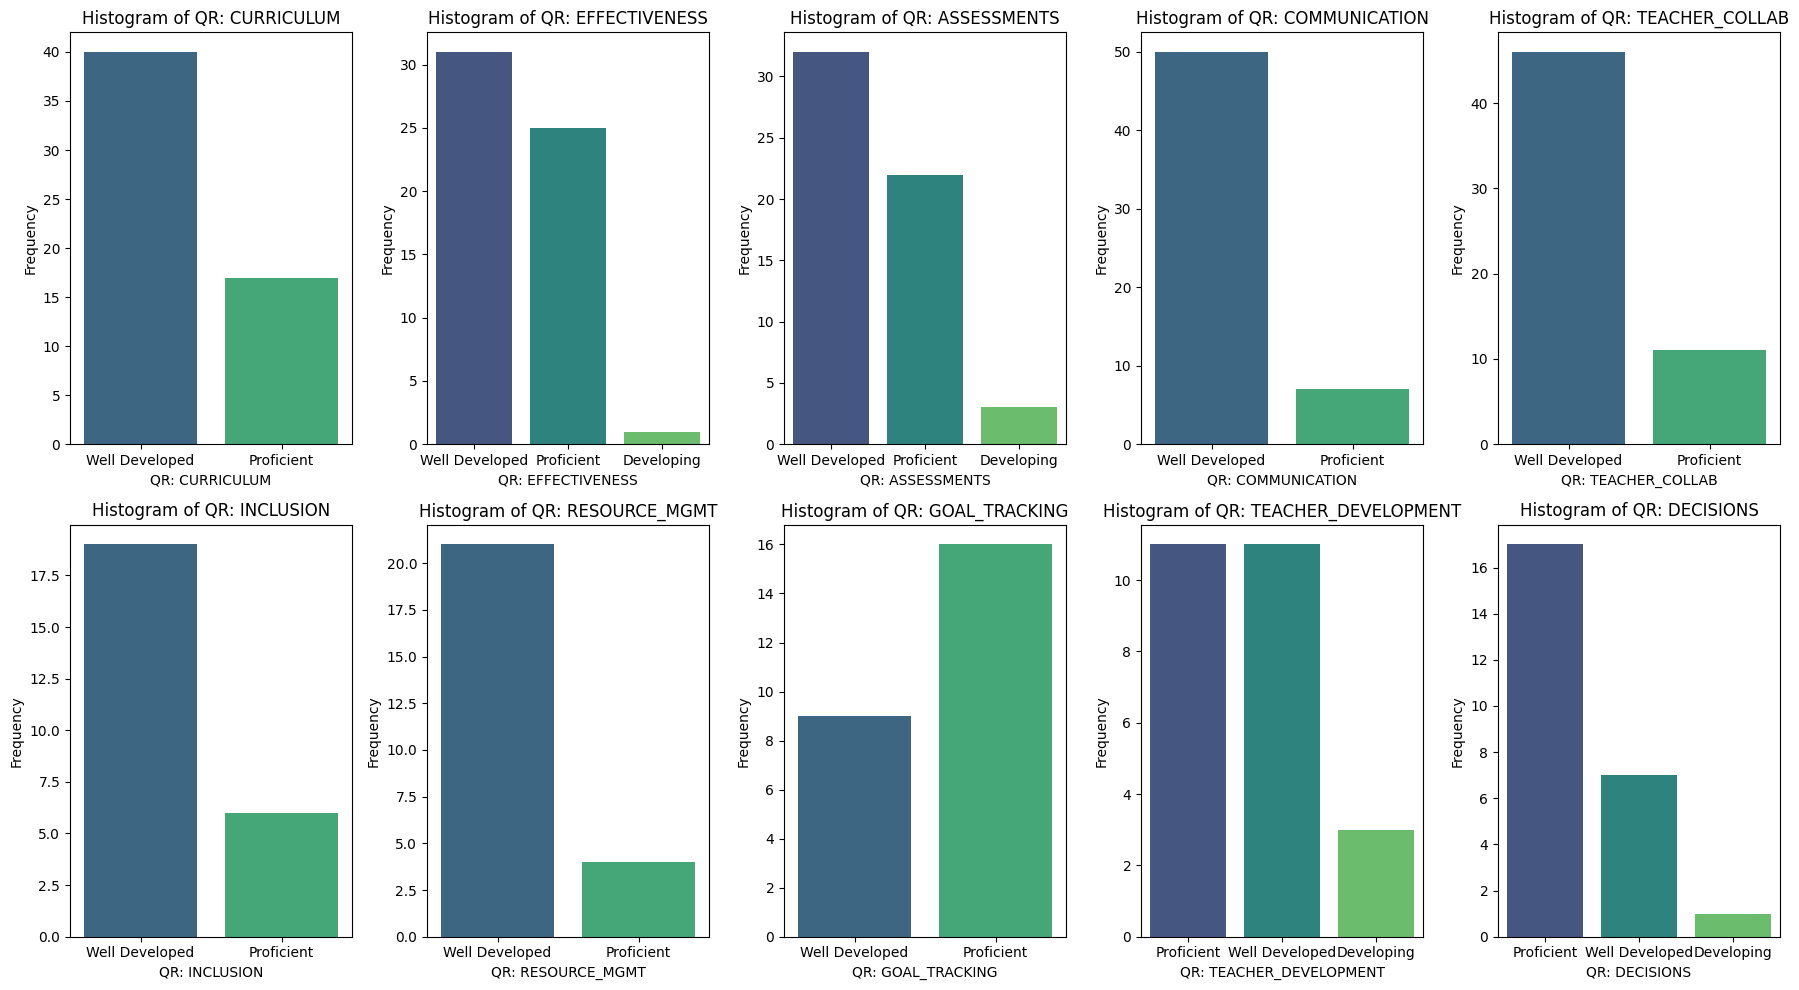

In [ ]:
# FEATURE: QUALITY REVIEWS

quality_reviews = ['QR: CURRICULUM', 'QR: EFFECTIVENESS', 'QR: ASSESSMENTS', 'QR: COMMUNICATION',
                   'QR: TEACHER_COLLAB', 'QR: INCLUSION', 'QR: RESOURCE_MGMT', 'QR: GOAL_TRACKING',
                   'QR: TEACHER_DEVELOPMENT', 'QR: DECISIONS']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(quality_reviews):
    plt.sca(axes[i])
    sns.countplot(x=df[feature], palette='viridis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')


plt.tight_layout()
plt.show()

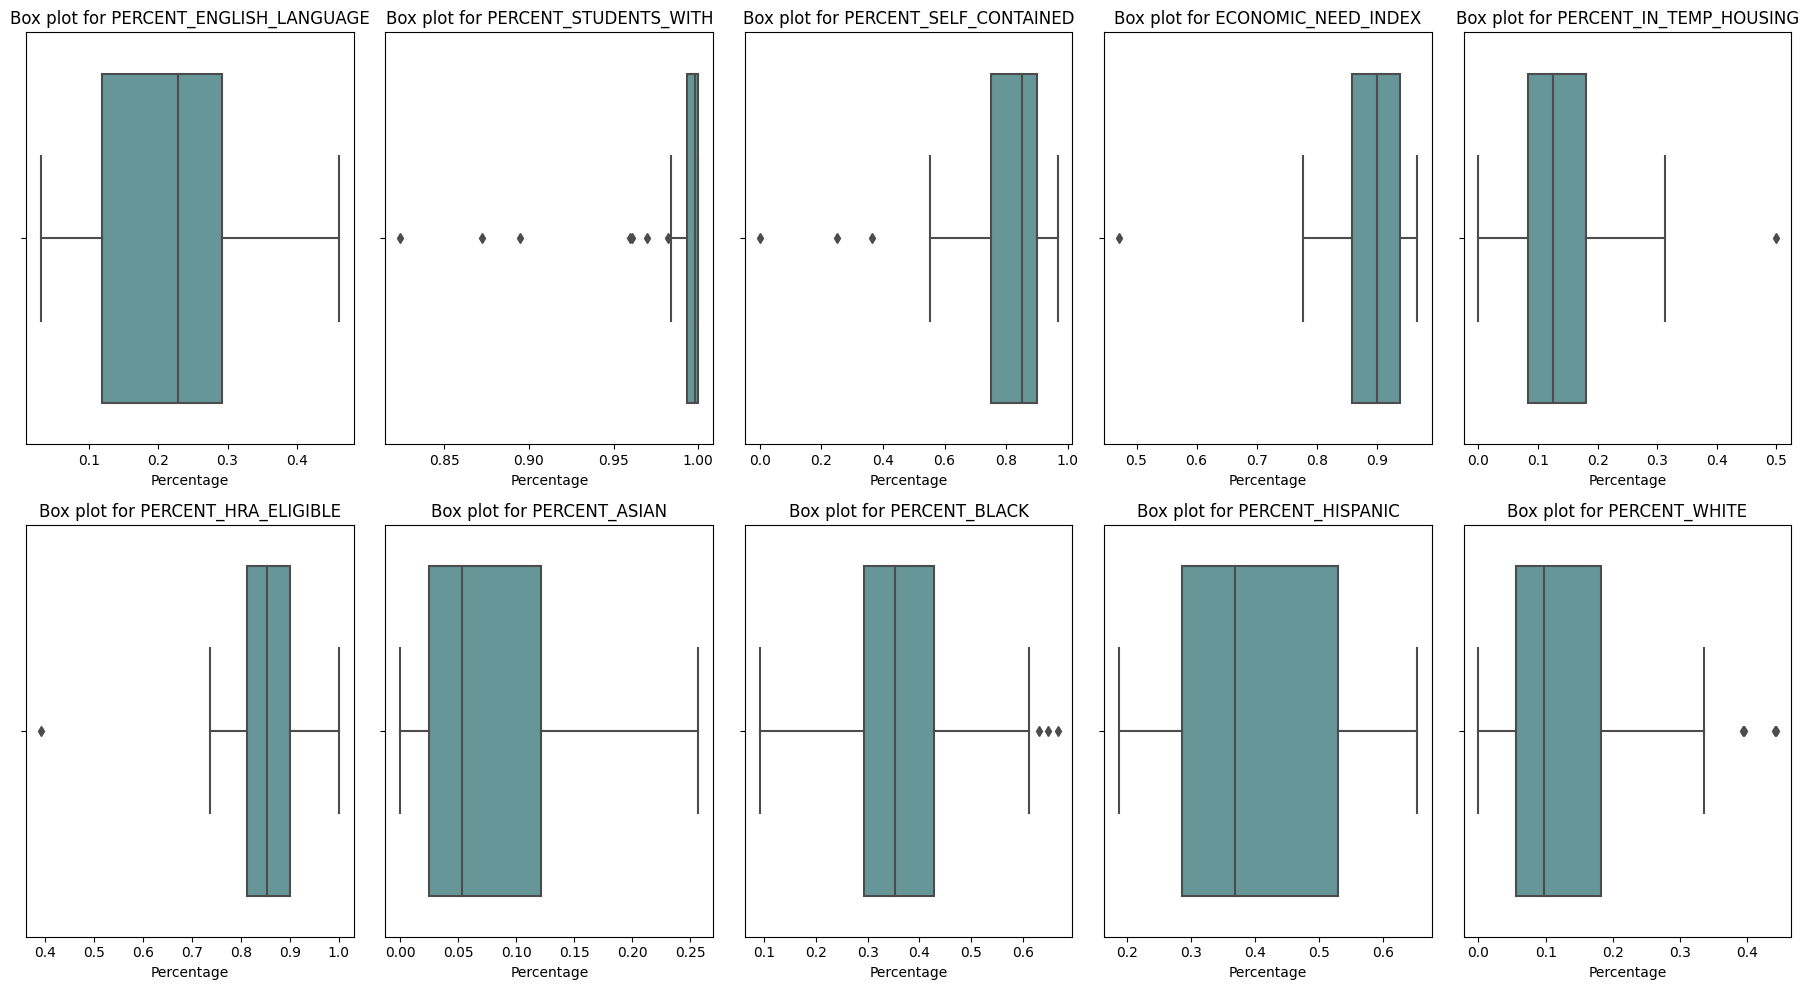

In [ ]:
# FEATURE: DEMOGRAPHICS

demographics = ['PERCENT_ENGLISH_LANGUAGE', 'PERCENT_STUDENTS_WITH', 'PERCENT_SELF_CONTAINED',
                'ECONOMIC_NEED_INDEX', 'PERCENT_IN_TEMP_HOUSING', 'PERCENT_HRA_ELIGIBLE',
                'PERCENT_ASIAN', 'PERCENT_BLACK', 'PERCENT_HISPANIC', 'PERCENT_WHITE']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
axes = axes.flatten()

# Boxplot
for i, percentage in enumerate(demographics):
    plt.sca(axes[i])
    sns.boxplot(x=df[percentage], color = 'cadetblue')
    plt.xlabel(f'Percentage')
    plt.title(f'Box plot for {percentage}')

plt.tight_layout()
plt.show()

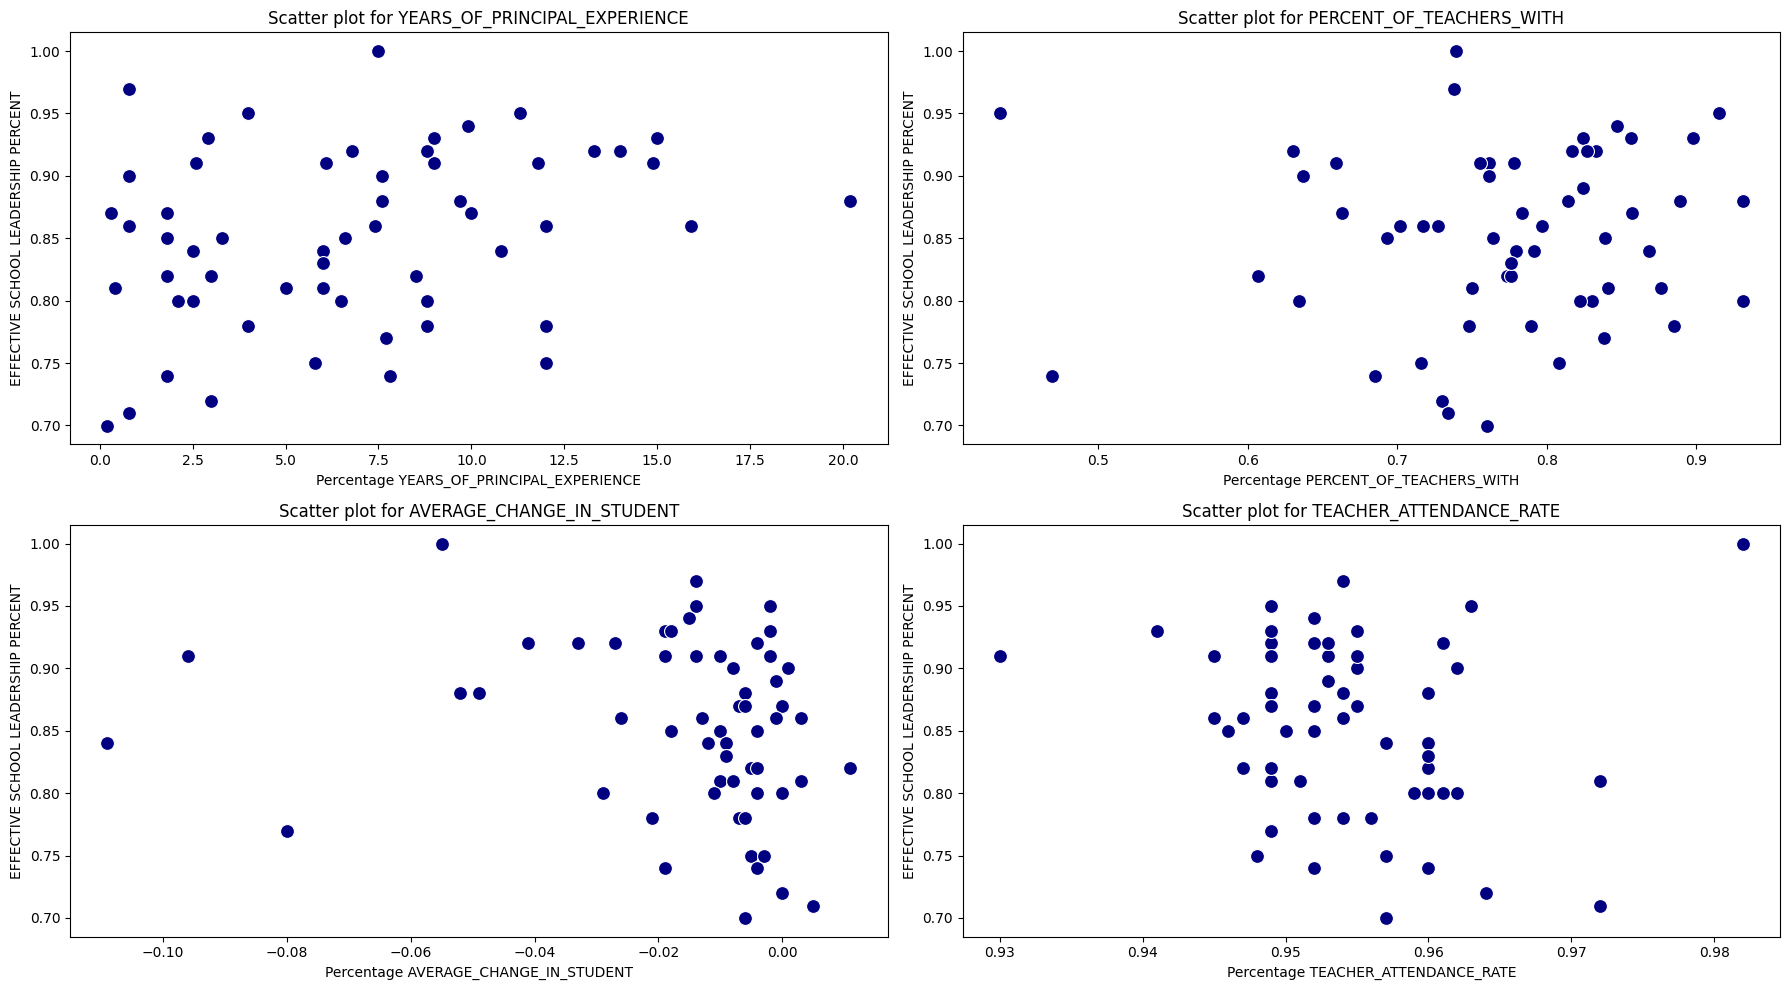

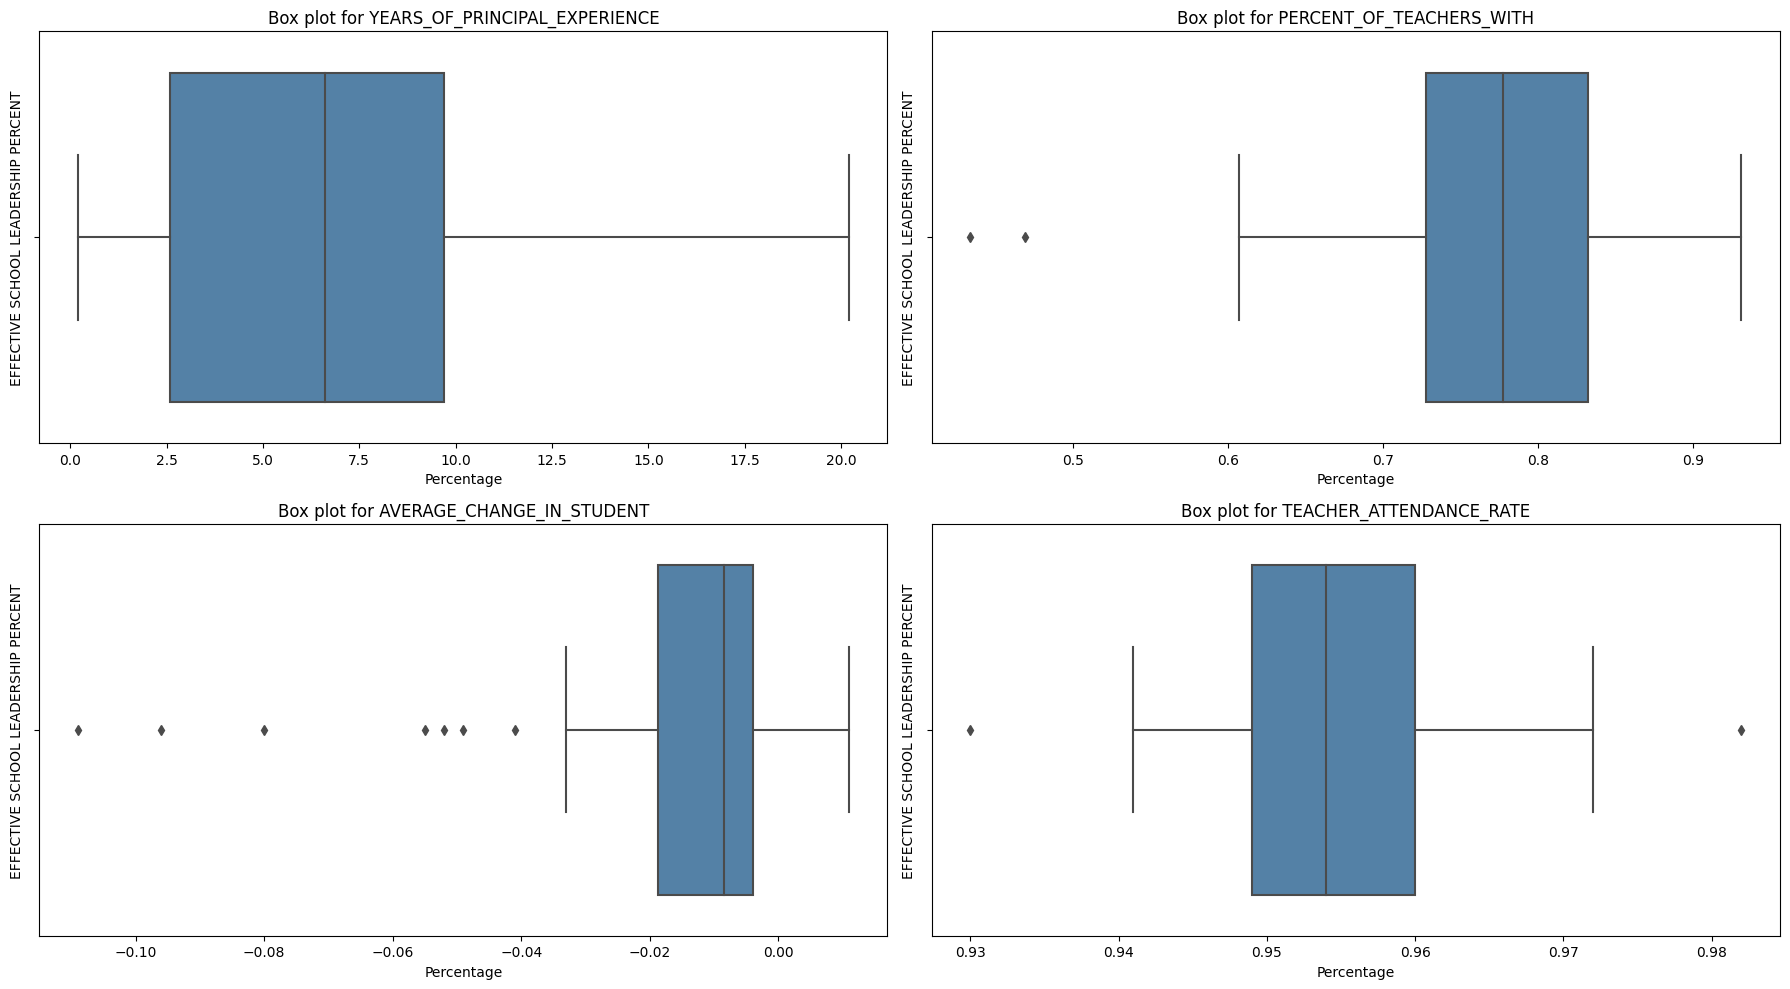

In [ ]:
# FEATURE: STAFF INFORMATION

staff_data = ['YEARS_OF_PRINCIPAL_EXPERIENCE', 'PERCENT_OF_TEACHERS_WITH', 'AVERAGE_CHANGE_IN_STUDENT' , 'TEACHER_ATTENDANCE_RATE']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

# Scatter plot
for i, percent in enumerate(staff_data):
    plt.sca(axes[i])
    sns.scatterplot(x=df[percent], y=df['EFFECTIVE_SCHOOL_LEADERSHIP_1'], color='navy', s=100)
    plt.xlabel(f'Percentage {percent}')
    plt.ylabel('EFFECTIVE SCHOOL LEADERSHIP PERCENT')
    plt.title(f'Scatter plot for {percent}')

plt.tight_layout()
plt.show()


# Boxplot
for i, percentage in enumerate(staff_data):
    plt.sca(axes[i])
    sns.boxplot(x=df[percentage], color = 'steelblue')
    plt.xlabel(f'Percentage')
    plt.title(f'Box plot for {percentage}')

plt.tight_layout()
plt.show()




#  TRAIN MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop rows with missing values
df = df.dropna(subset=['COLLABORATIVE_TEACHERS_PERCENT', 'SUPPORTIVE_ENVIRONMENT_PERCENT', 'STRONG_FAMILY_COMMUNITY_TIES', 'TRUST_PERCENT_POSITIVE'])

# Features
X = df[['COLLABORATIVE_TEACHERS_PERCENT', 'SUPPORTIVE_ENVIRONMENT_PERCENT', 'STRONG_FAMILY_COMMUNITY_TIES']]
# Target
y = df['TRUST_PERCENT_POSITIVE']

# One-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['STRONG_FAMILY_COMMUNITY_TIES'])
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_hat = model.predict(X_test)
print(y_hat[6], y_test.iloc[6])
print(y_test)
for i in y_hat:
    print(format(i, '.2f'))


0.9698256793511754 0.97
0     0.88
5     0.87
31    0.98
13    0.90
35    0.88
57    0.88
27    0.97
32    0.89
46    0.90
12    0.91
48    0.87
3     0.89
44    0.96
26    0.96
8     0.90
Name: TRUST_PERCENT_POSITIVE, dtype: float64
0.90
0.87
0.95
0.89
0.87
0.88
0.97
0.90
0.91
0.92
0.87
0.91
0.98
0.97
0.88


# Test and Evaluate


R-squared score on test data: 0.88
Mean Squared Error on test data: 0.0002
Root Mean Squared Error on test data: 0.0130
Mean Absolute Error on test data: 0.0106


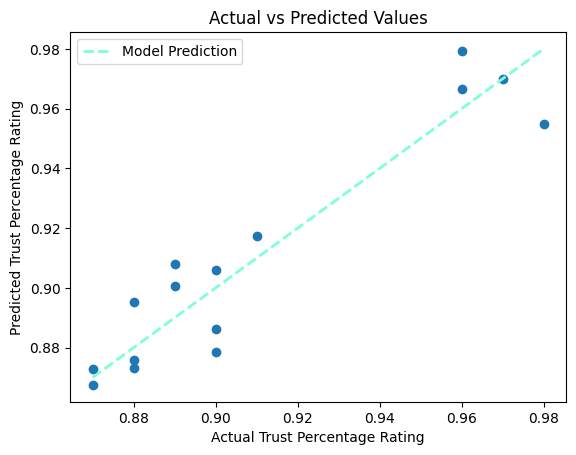

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared score on test data: {r2:.2f}')
print(f'Mean Squared Error on test data: {mse:.4f}')
print(f'Root Mean Squared Error on test data: {rmse:.4f}')
print(f'Mean Absolute Error on test data: {mae:.4f}')

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Trust Percentage Rating")
plt.ylabel("Predicted Trust Percentage Rating")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='aquamarine', linewidth=2, label='Model Prediction')

plt.legend()
plt.show()

## Evaluation Interpretation

R-squared is a measure of how well the model explains the variability in the dependent variable.  

The R-squared metric of 0.88 indicates that the model accounts for 88% of the variability in the target variable. A higher R-squared is generally desirable, as it means the model is better at explaining the variance in the data.  

In summary, the R-squared value of 0.88 indicates a good fit of the model to the data, and the low MSE, RMSE, and MAE values suggest that the model's predictions are close to the actual values.  

Through our data analysis, we found that there is a significant, positive relationship between the features of teacher collaboration, supportive school environment, and family/community ties with the trust rating of a school.


## Future Analysis

Test label-encoding instead of one-hot encoding for certain variables.
Add more features to the regression model.
Test for model overfitting and underfitting.
Adjust train-test-split sizes. 